# PuGo Modeling
## Step 1: Data Cleaning

The purpose of this script is to take in raw data (in this case, exported from SQL) and clean it before running ML models in python. Missing/null values will throw predictions off so these are dealt with in one of two ways: excluding or imputing. This script goes through the raw data and ensures there are no missing/raw data observations.

### Goals

* Clean raw data and fill in missing values

### Process

* A. Load data and modules
* B. Drop unnecessary columns
* C. Clean major and financial columns
* D. Clean up other variables
* E. Check final null list
* F. Impute missing values
* G. Export results

## Part A - Load data and modules
### Part A1 - Load modules

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
#from sklearn.linear_model import LinearRegression;
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

### Part A2 - Load data

In [2]:
data = pd.read_csv('PuGoHistorical.csv')

In [3]:
data.head()

AcademicQtrKeyId  ApplYr  ApplQtr  FiscalYr  SDBSrcSystemKey  \
0             20174    2017        4      2018          1911633   
1             20174    2017        4      2018          1900064   
2             20174    2017        4      2018          1896511   
3             20174    2017        4      2018          1890052   
4             20174    2017        4      2018          1893371   

              StudentName  Enrolled  Admitted  PuGoOffer  \
0          VONTELA,ANJALI         0         0          0   
1      JOHN,ANDERSON ALEX         0         0          0   
2   CAVLAN,LETICIA ALEXIS         0         0          0   
3  BEAUDRY,BENJAMIN OSCAR         0         0          0   
4   CRAWFORD,CARLOS JAMES         0         0          0   

   HolisticAcademicScore       ...        Other_Budget  Tuition  \
0                     12       ...               15621    35538   
1                     12       ...               15621    35538   
2                      8       ...               15621    35538   
3                     10       ...               15621    35538   
4                     10       ...               15621    35538   

               FINGroupings  HS_For_Lang_Yrs  HS_Math_Level  HS_Yrs_Arts  \
0  FIN5 - $30K-40K Unfunded              2.0            5.0          0.0   
1           FIN1 - No FAFSA              3.0            5.0          2.0   
2  FIN4 - $15K-30K Unfunded              3.0            4.0          2.0   
3        FIN2 - $0 Unfunded              3.0            4.0          3.0   
4        FIN2 - $0 Unfunded              3.0            4.0          0.0   

   HS_Yrs_For_Lang  HS_Yrs_Math  HS_Yrs_Science  HS_Yrs_Soc_Sci  
0              0.0          0.0             0.0             0.0  
1              3.0          4.0             4.0             3.0  
2              3.0          4.0             4.0             2.0  
3              3.0          4.0             4.0             0.0  
4              3.0          5.0             3.0             3.0  

[5 rows x 74 columns]

### Part A3 - Sanity checks

In [4]:
len(data)

72396

In [5]:
data.groupby('ApplYr')['Enrolled'].mean()

ApplYr
2014    0.091845
2015    0.087348
2016    0.057488
2017    0.057324
Name: Enrolled, dtype: float64

In [6]:
data[data.Admitted == 1].groupby('ApplYr')['Enrolled'].mean()

ApplYr
2014    0.167074
2015    0.162783
2016    0.129774
2017    0.128667
Name: Enrolled, dtype: float64

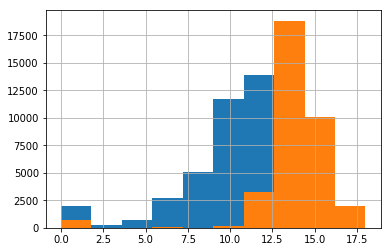

In [7]:
data.groupby('Admitted').HolisticAdmissionScore.hist();

In [8]:
data.ApplYr.value_counts()

2017    22050
2016    20526
2015    16417
2014    13403
Name: ApplYr, dtype: int64

In [9]:
data.groupby('ApplYr')['PuGoOffer'].sum()

ApplYr
2014    19463000
2015    34415500
2016    30564500
2017    31257500
Name: PuGoOffer, dtype: int64

In [10]:
data.columns

Index([u'AcademicQtrKeyId', u'ApplYr', u'ApplQtr', u'FiscalYr',
       u'SDBSrcSystemKey', u'StudentName', u'Enrolled', u'Admitted',
       u'PuGoOffer', u'HolisticAcademicScore', u'HolisticPQAScore',
       u'HolisticAdmissionScore', u'parent1_ed_level', u'parent2_ed_level',
       u'HighestParentalEducation', u'TestScore', u'AcademicScore',
       u'AcademicRank', u'HS_AI', u'HS_GPA', u'HighSchoolCode', u'HS_State',
       u'AgeDecimal', u'AgeYrs', u'FirstGeneration_4YrDegree',
       u'FirstGeneration_Matriculated', u'Athlete', u'CollegeInTheHighSchool',
       u'RunningStart', u'TR_GPA', u'EntryClass', u'AlumOffspring',
       u'Conditional', u'Provisional', u'Major_Assign1', u'Major_Req1',
       u'Old_Major_Category', u'CIP', u'NaturalResources', u'Architecture',
       u'EthnicCultStudies', u'Communications', u'Education',
       u'EngineeringCompSci', u'ForeignLang', u'SocialSciences', u'Biology',
       u'Math', u'HistPhil', u'Psych', u'Arts', u'Health', u'Business',
       u'

## Part B - Drop unnecessary columns

In [11]:
drop_eps = True

toDrop = ['AcademicQtrKeyId', u'ApplQtr', u'FiscalYr', u'SDBSrcSystemKey', u'StudentName',
          u'FAFSAStudentBudget', u'FAFSATuition', u'TuitionRemainingNoNeg', u'TuitionRemaining', 
          u'TotalBudgetRemainingNoNeg', u'TotalBudgetRemaining', u'Major_Assign1', u'Equity', 
          u'ParentalMaritalStatus', u'appl_rcvd_dt', u'UnfundedNeedNoNeg', u'UnfundedNeed',  
          u'WorkAndAllLoans', u'Total_Budget']
#Other_Budget, 'NonPLUSLoans', u'WorkStudy', u'PLUSLoans', u'WorkAndLoansNoPLUS', 'WorkAndAllLoans'
dataClean = data.drop(toDrop, axis = 1, errors = 'ignore')

In [12]:
epsColumns = ['UWAttraction_TotalCount',
 'UWAttraction_TotalPct',
 'UWAttraction_ProdPct',
 'UWLocationAttraction_TotalCount',
 'UWLocationAttraction_TotalPct',
 'UWEdGoals_TotalCount',
 'UWEdGoals_TotalPct',
 'UWEdGoals_ProdPct',
 'LowerIncomePct',
 'LowerIncomeCount',
 'HigherIncomeCount',
 'LowerParentEdPct',
 'LowerParentEdCount',
 'HigherParentEdCount',
 'CollegeLocationPct_BorderState',
 'FamilyIncomePct_140to200k',
 'FirstGenerationPct_Not1stGen',
 'ParentEducationPct_NoResponse']
epsDerived = ['DeltaParentEdMinusAcademic', 'DeltaAcademicMinusParentEd', 'DeltaIncomeMinusAcademic', 'DeltaAcademicMinusIncome']

In [13]:
if drop_eps: #drop EPS columns
    dataClean = dataClean.drop(epsColumns + epsDerived, axis = 1, errors = 'ignore')
else: #otherwise, fill them in with median values
    for each in epsColumns:
        dataClean.loc[dataClean[each].isnull(), each] = dataClean[each].median()
    # Recalculate values after filling missing in
    dataClean.DeltaParentEdMinusAcademic = (dataClean.LowerParentEdPct / dataClean.LowerParentEdPct.max()) - dataClean.AcademicScore
    dataClean.DeltaAcademicMinusParentEd = dataClean.AcademicScore - (dataClean.LowerParentEdPct / dataClean.LowerParentEdPct.max())
    dataClean.DeltaIncomeMinusAcademic = (dataClean.LowerIncomePct / dataClean.LowerIncomePct.max()) - dataClean.AcademicScore
    dataClean.DeltaAcademicMinusIncome = dataClean.AcademicScore - (dataClean.LowerIncomePct / dataClean.LowerIncomePct.max())

## Part C - Clean major and financial columns
### Part C1 - Clean up major intent

In [14]:
dataClean = dataClean.drop(['Major_Req1', 'Old_Major_Category', 'CIP'], axis = 1)

### Part C2 - Clean up financial aid groupings

In [15]:
finDict = {'FIN1 - No FAFSA':'NoFafsa_Fin1',
'FIN2 - $0 Unfunded':'Unfunded0K_Fin2',
'FIN3 - $1-15K Unfunded':'Unfunded15K_Fin3',
'FIN4 - $15K-30K Unfunded':'Unfunded30K_Fin4',
'FIN5 - $30K-40K Unfunded':'Unfunded40K_Fin5',
'FIN 6 - $40K+ Unfunded':'Unfunded40Kplus_Fin6'}

In [16]:
dataClean.FINGroupings = dataClean.FINGroupings.map(finDict)

In [17]:
dataClean = dataClean.join(pd.get_dummies(dataClean.FINGroupings))
dataClean = dataClean.drop(['FINGroupings'], axis = 1)

## Part D - Clean up other variables
### Part D1 - Dummify HS codes

In [18]:
# Dummify top 10 HS codes and drop the rest
hsCodes = dataClean.HighSchoolCode.value_counts().iloc[:10].index.values
for each in hsCodes:
    dataClean['hs_code_' + str(each)] = (dataClean.HighSchoolCode == each).astype(int)

### Part D2 - Dummify HS states

In [19]:
# Dummify top 10 HS states and drop the rest
hsStates = dataClean.HS_State.value_counts().iloc[:10].index.values
for each in hsStates:
    dataClean['hs_state_' + str(each)] = (dataClean.HS_State == each).astype(int)

In [20]:
dataClean = dataClean.drop(['HighSchoolCode', 'HS_State'], axis = 1)

### Part D3 - Clean up other variables

In [21]:
dataClean['over_20'] = dataClean.AgeDecimal >= 20 #binary indication of student being over 20

In [22]:
# create binary indication of whether the student was a true freshman or not
dataClean.loc[dataClean.EntryClass == 0, 'EntryClass'] = 1
dataClean = dataClean.join(pd.get_dummies(dataClean.EntryClass, prefix = 'entry_class'))
dataClean['not_freshman'] = dataClean.EntryClass > 1
dataClean = dataClean.drop('EntryClass', axis = 1)

In [23]:
# create binary indications of whether student took college in HS
dataClean.CollegeInTheHighSchool = dataClean.CollegeInTheHighSchool == 'Y'
dataClean.RunningStart = dataClean.RunningStart == 'Y'

In [24]:
# more conversions to binary indicators
dataClean.Athlete = dataClean.Athlete > 0
dataClean.FirstGeneration_4YrDegree = dataClean.FirstGeneration_4YrDegree == 'Y'
dataClean.FirstGeneration_Matriculated = dataClean.FirstGeneration_Matriculated == 'Y'

In [25]:
dataClean.Conditional = dataClean.Conditional > 0
dataClean.Provisional = dataClean.Provisional > 0

In [26]:
# create binary indicators for FAFSA variables
dataClean.Dependency = dataClean.Dependency == 'Independent'
dataClean['FiledFAFSA'] = ~dataClean.FAFSAFiledOnTime.isnull() #whether FAFSA was filed, regardless of lateness
dataClean.FAFSAFiledOnTime = dataClean.FAFSAFiledOnTime == 'Y'

In [27]:
#filling these in with median values
dataClean.loc[dataClean.HS_AI.isnull(), 'HS_AI'] = dataClean.HS_AI.median()
dataClean.loc[dataClean.HS_For_Lang_Yrs.isnull(), 'HS_For_Lang_Yrs'] = dataClean.HS_For_Lang_Yrs.median()
dataClean.loc[dataClean.HS_Math_Level.isnull(), 'HS_Math_Level'] = dataClean.HS_Math_Level.median()
dataClean.loc[dataClean.HS_Yrs_Arts.isnull(), 'HS_Yrs_Arts'] = dataClean.HS_Yrs_Arts.median()
dataClean.loc[dataClean.HS_Yrs_For_Lang.isnull(), 'HS_Yrs_For_Lang'] = dataClean.HS_Yrs_For_Lang.median()
dataClean.loc[dataClean.HS_Yrs_Math.isnull(), 'HS_Yrs_Math'] = dataClean.HS_Yrs_Math.median()
dataClean.loc[dataClean.HS_Yrs_Science.isnull(), 'HS_Yrs_Science'] = dataClean.HS_Yrs_Science.median()
dataClean.loc[dataClean.HS_Yrs_Soc_Sci.isnull(), 'HS_Yrs_Soc_Sci'] = dataClean.HS_Yrs_Soc_Sci.median()

In [28]:
# transfer GPAs
dataClean.TR_GPA.fillna(0, inplace = True)
dataClean['TR_GPA_exists'] = dataClean.TR_GPA > 0

In [29]:
# indications of whether student was STEM focused
dataClean['HS_Math_over_4'] = dataClean.HS_Math_Level > 4
dataClean['HS_Yrs_Math_over_4'] = dataClean.HS_Yrs_Math > 4
dataClean['HS_Yrs_Science_over_4'] = dataClean.HS_Yrs_Science > 4

## Part E - Check final null list

In [30]:
dataClean = dataClean[~dataClean.HS_GPA.isnull()]

In [31]:
# this is the final list of columns with null values. This should only include the following (which will be imputed):
# [u'parent1_ed_level', u'parent2_ed_level', u'HighestParentalEducation', u'TestScore', u'EFC', u'Income']
dataClean.columns[dataClean.isnull().any()]

Index([u'parent1_ed_level', u'parent2_ed_level', u'HighestParentalEducation',
       u'TestScore', u'EFC', u'Income'],
      dtype='object')

## Part F - Impute values

In [32]:
# square away different sets of variables to use in the groupings when imputing
scores = [u'HolisticAcademicScore', u'HolisticPQAScore', u'HolisticAdmissionScore']
fafsaCols = ['EFC', 'Income']
toPredictCols = ['parent1_ed_level', 'parent2_ed_level', 'HighestParentalEducation', 'TestScore', 'HS_GPA']
toPredictCols2 = ['TestScore', 'HS_GPA']
otherToDrop = ['Enrolled', 'PuGoOffer', 'ApplYr', 'Admitted']

In [33]:
#gradient boosted model. Note: params have not been optimized
clf = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 1000, verbose = 1)

### Part F1 - Impute parent ed1

In [34]:
# toFit and toPredict will be recycled through imputing.
# toFit - observations where values to impute are not missing
# toPredict - observations where values are missing

toFit = dataClean[~dataClean.parent1_ed_level.isnull()]
toPredict = dataClean[dataClean.parent1_ed_level.isnull()]

In [35]:
#fit model and get predictions
clf.fit(toFit.drop(otherToDrop + scores + fafsaCols + toPredictCols, axis = 1), toFit.parent1_ed_level)

predictedValues = clf.predict(toPredict.drop(otherToDrop + scores + fafsaCols + toPredictCols, axis = 1)).round()

      Iter       Train Loss   Remaining Time 
         1           1.8046            3.13m
         2           1.5942            3.14m
         3           1.4237            3.33m
         4           1.2856            3.48m
         5           1.1737            3.46m
         6           1.0829            3.48m
         7           1.0094            3.43m
         8           0.9498            3.39m
         9           0.9014            3.38m
        10           0.8620            3.37m
        20           0.7118            3.27m
        30           0.6910            3.19m
        40           0.6863            3.14m
        50           0.6834            3.00m
        60           0.6815            2.90m
        70           0.6798            2.82m
        80           0.6784            2.75m
        90           0.6771            2.65m
       100           0.6760            2.59m
       200           0.6678            2.16m
       300           0.6605            1.90m
       40

In [36]:
# save predictions
dataClean['parent1_ed_level'] = toFit.parent1_ed_level.append(pd.Series(predictedValues, index = toPredict.index))

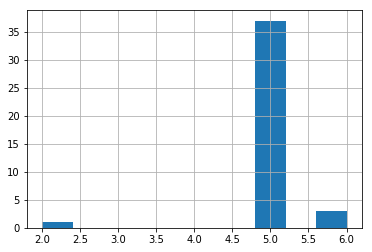

In [37]:
# check predicted values vs known values
pd.Series(predictedValues, index = toPredict.index).hist();

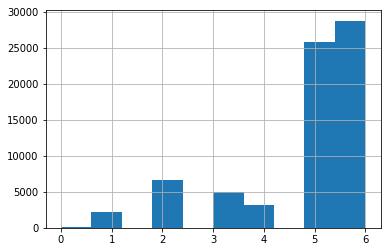

In [38]:
toFit.parent1_ed_level.hist();

### Part F2 - Impute parent ed2

In [39]:
# repeat same process as F1 but with different variables
toFit = dataClean[~dataClean.parent2_ed_level.isnull()]
toPredict = dataClean[dataClean.parent2_ed_level.isnull()]

In [40]:
clf.fit(toFit.drop(otherToDrop + scores + fafsaCols + toPredictCols, axis = 1), toFit.parent2_ed_level)

predictedValues = clf.predict(toPredict.drop(otherToDrop + scores + fafsaCols + toPredictCols, axis = 1)).round()

      Iter       Train Loss   Remaining Time 
         1           2.0612            2.96m
         2           1.8859            2.96m
         3           1.7436            2.95m
         4           1.6282            2.94m
         5           1.5345            2.95m
         6           1.4584            2.95m
         7           1.3966            2.97m
         8           1.3463            2.97m
         9           1.3052            2.98m
        10           1.2716            2.99m
        20           1.1399            3.00m
        30           1.1169            2.98m
        40           1.1094            2.95m
        50           1.1055            2.83m
        60           1.1027            2.71m
        70           1.1003            2.64m
        80           1.0978            2.57m
        90           1.0961            2.51m
       100           1.0941            2.48m
       200           1.0784            2.14m
       300           1.0684            1.85m
       40

In [41]:
dataClean['parent2_ed_level'] = toFit.parent2_ed_level.append(pd.Series(predictedValues, index = toPredict.index))

In [42]:
dataClean['HighestParentalEducation'] = dataClean[['parent1_ed_level', 'parent2_ed_level']].max(axis = 1)

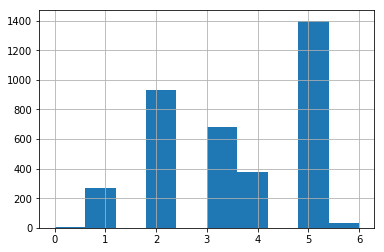

In [43]:
pd.Series(predictedValues, index = toPredict.index).hist();

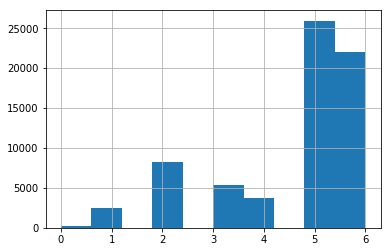

In [44]:
toFit.parent2_ed_level.hist();

### Part F3 - Impute test scores

In [45]:
# Repeat same process as F1, F2
toFit = dataClean[~dataClean.TestScore.isnull()]
toPredict = dataClean[dataClean.TestScore.isnull()]

In [46]:
clf.fit(toFit.drop(otherToDrop + scores + fafsaCols + toPredictCols2, axis = 1), toFit.TestScore)

predictedValues = clf.predict(toPredict.drop(otherToDrop + scores+ fafsaCols + toPredictCols2, axis = 1)).round()

      Iter       Train Loss   Remaining Time 
         1       23712.8171            3.51m
         2       21636.7114            3.53m
         3       19938.4190            3.60m
         4       18487.4913            3.59m
         5       17242.6491            3.62m
         6       16207.9539            3.61m
         7       15314.6935            3.61m
         8       14534.7994            3.62m
         9       13848.5983            3.63m
        10       13241.1214            3.62m
        20        9887.2277            3.52m
        30        8623.9442            3.42m
        40        7965.5030            3.22m
        50        7371.2736            3.14m
        60        6426.0830            3.08m
        70        5461.2418            3.01m
        80        4785.2736            2.96m
        90        4343.9329            2.90m
       100        4011.6874            2.87m
       200        2303.3691            2.52m
       300        1700.2292            2.19m
       40

In [47]:
predictedValues.mean()

1260.8973087818697

In [48]:
dataClean['TestScore'] = toFit.TestScore.append(pd.Series(predictedValues, index = toPredict.index))
dataClean.loc[dataClean['TestScore'] > 1600, 'TestScore'] = 1600

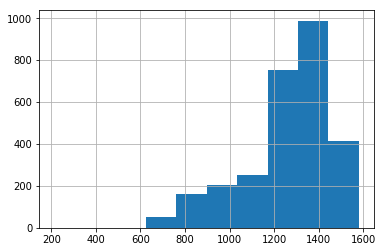

In [49]:
pd.Series(predictedValues, index = toPredict.index).hist();

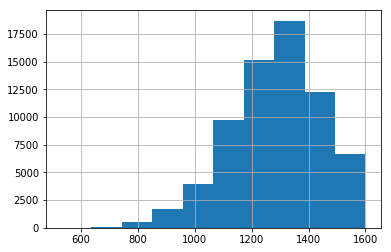

In [50]:
toFit.TestScore.hist();

### Part F4 - Impute FAFSA cols

In [51]:
# again, more or less a repeat of above but with different variables

dataClean.loc[dataClean.Income < 0, 'Income'] = 0 #negative incomes?

In [52]:
toFit = dataClean[~dataClean.Income.isnull()]
toPredict = dataClean[dataClean.Income.isnull()]

In [53]:
clf.fit(toFit.drop(otherToDrop + scores + fafsaCols, axis = 1), toFit.Income)

      Iter       Train Loss   Remaining Time 
         1 65375746320.7465            2.51m
         2 62816994589.7327            2.53m
         3 60742955281.9978            2.51m
         4 59053498156.9010            2.51m
         5 57682738829.5479            2.51m
         6 56564850920.6609            2.52m
         7 55657441325.9562            2.51m
         8 54885877105.0119            2.50m
         9 54250506305.9307            2.49m
        10 53755799701.2947            2.49m
        20 51682684465.7067            2.46m
        30 51240478143.6959            2.42m
        40 50658223617.0947            2.36m
        50 50393887099.1902            2.24m
        60 50218772684.3464            2.14m
        70 50046158582.1102            2.08m
        80 49796042913.5637            2.00m
        90 49556742142.9649            1.94m
       100 49412369931.6795            1.88m
       200 46846945133.5449            1.56m
       300 44301261555.5681            1.35m
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=1, warm_start=False)

In [54]:
predictedValues = clf.predict(toPredict.drop(otherToDrop + scores + fafsaCols, axis = 1)).round()
predictedValues[predictedValues < 0] = 0

In [55]:
predictedValues.mean()

23960.885084563535

In [56]:
toFit.Income.describe()

count    4.751600e+04
mean     1.789423e+05
std      2.617684e+05
min      0.000000e+00
25%      5.791125e+04
50%      1.292990e+05
75%      2.252492e+05
max      1.007398e+07
Name: Income, dtype: float64

In [57]:
pd.Series(predictedValues, index = toPredict.index).describe()

count    2.418300e+04
mean     2.396089e+04
std      6.564447e+04
min      0.000000e+00
25%      4.110000e+03
50%      1.707300e+04
75%      3.005650e+04
max      3.420150e+06
dtype: float64

In [58]:
dataClean['Income'] = toFit.Income.append(pd.Series(predictedValues, index = toPredict.index))

In [59]:
toFit = dataClean[~dataClean.EFC.isnull()]
toPredict = dataClean[dataClean.EFC.isnull()]

In [60]:
clf.fit(toFit.drop(otherToDrop + scores + ['EFC'], axis = 1), toFit.EFC)

      Iter       Train Loss   Remaining Time 
         1  7117593991.4869            2.15m
         2  6223798489.6183            2.16m
         3  5492876248.9141            2.19m
         4  4898122744.0999            2.33m
         5  4410829359.7120            2.35m
         6  4013756861.9360            2.34m
         7  3689901111.2947            2.31m
         8  3426283683.3480            2.29m
         9  3209580158.9521            2.28m
        10  3033932645.6431            2.27m
        20  2337506402.9115            2.23m
        30  2217595384.3814            2.22m
        40  2173521736.7622            2.16m
        50  2143610809.2703            2.07m
        60  2122522180.3896            1.99m
        70  2106537834.6307            1.96m
        80  2093988978.7685            1.94m
        90  2080715110.8955            1.92m
       100  2066877304.5149            1.87m
       200  1953490481.5569            1.58m
       300  1830328916.9769            1.35m
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=1, warm_start=False)

In [61]:
predictedValues = clf.predict(toPredict.drop(otherToDrop + scores + ['EFC'], axis = 1)).round()
predictedValues[predictedValues < 0] = 0

In [62]:
predictedValues.mean()

5675.168589505024

In [63]:
toFit.EFC.describe()

count     47516.000000
mean      53472.756356
std       90662.586056
min           0.000000
25%        5464.000000
50%       26938.500000
75%       64213.250000
max      999999.000000
Name: EFC, dtype: float64

In [64]:
pd.Series(predictedValues, index = toPredict.index).describe()

count     24183.000000
mean       5675.168590
std       21367.214315
min           0.000000
25%         827.500000
50%        2187.000000
75%        3825.000000
max      964460.000000
dtype: float64

In [65]:
dataClean['EFC'] = toFit.EFC.append(pd.Series(predictedValues, index = toPredict.index))

### Part F5 - Dummify remaining and recalculate

In [66]:
tempDF = pd.get_dummies(dataClean['HighestParentalEducation'].astype(int), prefix='ed')

tempDF['ed_1m'] = tempDF['ed_1'] + tempDF['ed_2'] + tempDF['ed_3'] + tempDF['ed_4'] + tempDF['ed_5'] + tempDF['ed_6']
tempDF['ed_2m'] = tempDF['ed_2'] + tempDF['ed_3'] + tempDF['ed_4'] + tempDF['ed_5'] + tempDF['ed_6']
tempDF['ed_3m'] = tempDF['ed_3'] + tempDF['ed_4'] + tempDF['ed_5'] + tempDF['ed_6']
tempDF['ed_4m'] = tempDF['ed_4'] + tempDF['ed_5'] + tempDF['ed_6']
tempDF['ed_5m'] = tempDF['ed_5'] + tempDF['ed_6']

dataClean = dataClean.join(tempDF)

In [67]:
dataClean['AcademicScore_imputed'] = (dataClean.HS_GPA / 4.0 * 0.85) + (dataClean.TestScore * 1.0 / 1600.0 * 0.15)

## Part G - Export results
### Part G1 - Final check of nulls

In [68]:
dataClean.columns[dataClean.isnull().any()] #this should be an empty list. If not, something needs to be rechecked

Index([], dtype='object')

### Part G2 - Save outputs

In [69]:
len(dataClean)

71699

In [70]:
dataClean.columns

Index([u'ApplYr', u'Enrolled', u'Admitted', u'PuGoOffer',
       u'HolisticAcademicScore', u'HolisticPQAScore',
       u'HolisticAdmissionScore', u'parent1_ed_level', u'parent2_ed_level',
       u'HighestParentalEducation',
       ...
       u'ed_3', u'ed_4', u'ed_5', u'ed_6', u'ed_1m', u'ed_2m', u'ed_3m',
       u'ed_4m', u'ed_5m', u'AcademicScore_imputed'],
      dtype='object', length=108)

In [71]:
dataClean.to_csv('pugoDataClean.csv', index = False)